### Pandas project - attacks.csv analysis
Jacobo Maté

In [1]:
import numpy as np # Importamos paquetes
import pandas as pd
import matplotlib.pyplot as plt # He encntrado esta librería para graficar el numero de ataques que ha habido por año

In [2]:
path = '../data/attacks_limpio.csv' # Definimos el path desde el que descargar el csv
df = pd.read_csv(path, encoding = "ISO-8859-1")

In [3]:
df.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,...,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018.06.25,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",standing,AdysonÂ McNeely,F,...,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",surfing,John Denges,M,...,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


#### Análisis temporal - `date`

In [6]:
# En primer lugar voy a definir una variable que recuente el número de ataques por año
contador = df.groupby('year').size().reset_index(name='Contador ataques')

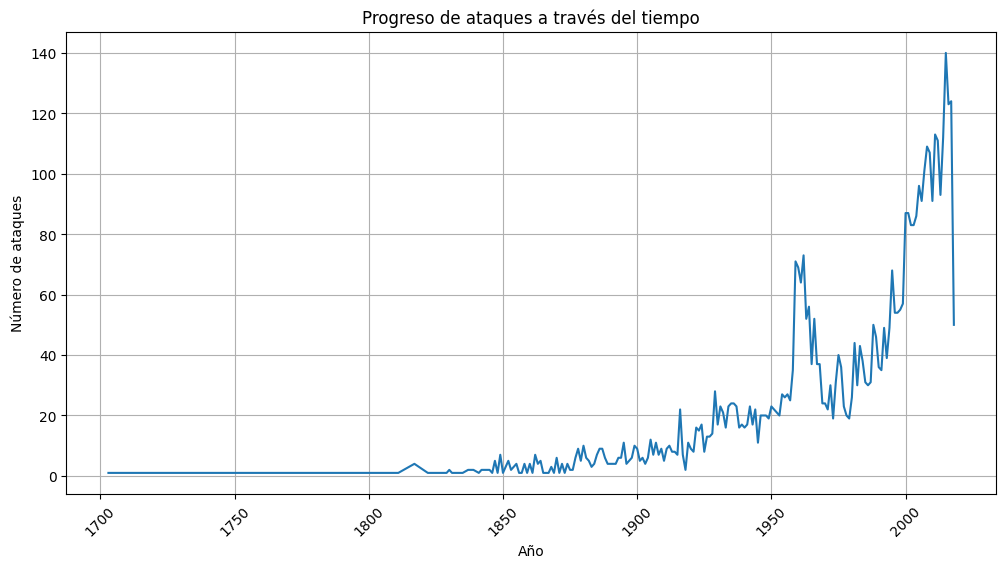

In [7]:
plt.figure(figsize=(12,6))
plt.plot(contador['year'], contador['Contador ataques'])
plt.xlabel('Año')
plt.ylabel('Número de ataques')
plt.title('Progreso de ataques a través del tiempo')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


De esta gráfica podemos ver un aumento considerable desde el comienzo de la toma de datos, aunque esto seguramente se deba a que antaño no se recogían tantos datos como ahora. Además, debido a la globalización y la evolución de los deportes acuáticos es más común que haya gente en el agua y por tanto es mas posible que se den ataques.
Por otro lado, resulta interesante ver los dos picos de ataque que se dan alrededor de los años sesenta y otro todavía mas pronunciado desde el 2010 hasta el 2020.

#### Análisis por actividad

In [10]:
# Vamos a agrupar los datos por la actividad que estaba realizando la víctima en el momento del ataque y contar el número de ataques para estos casos.
df.activity.value_counts().head(15)

activity
surfing           1137
swimming           886
fishing            795
diving             420
Surfing            206
wading             123
bathing            104
standing            87
snorkeling          76
kayaking            31
treading water      28
walking             14
sea disaster        13
floating            12
rowing              11
Name: count, dtype: int64

Aquí se muestran las 15 actividades con más casos. Destaca por encima de todas el surf, con una amplia mayoría de los casos. También le siguen el nado y la pesca.